# Marc Notebook

# Naive Price Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!pwd

/home/marcnaweb/code/marcnaweb/car_recommendation_engine/notebooks


In [3]:
# car_prices_enriched_v2.csv
#price_df = pd.read_csv('/home/marcnaweb/code/marcnaweb/car_recommendation_engine/raw_data/car_prices_enriched_v3_carPriceIndex.csv', index_col=0)
price_df = pd.read_csv('/home/marcnaweb/code/marcnaweb/car_recommendation_engine/raw_data/car_prices_enriched_v2.csv', index_col=0)

In [4]:
price_df.columns

Index(['car_code', 'car_last_price_in_brl', 'car_manufacturer', 'car_model',
       'car_model_year', 'first_year_of_tracking', 'last_factory_price',
       'last_factory_price_year', 'year_01', 'year_02', 'year_03', 'year_04',
       'year_05', 'year_06', 'year_07', 'year_08', 'year_09', 'year_10',
       'year_11', 'year_12', 'year_13', 'year_14', 'year_15', 'year_16',
       'year_17', 'year_18', 'year_19', 'year_20', 'new_car_ajustment_index',
       'new_car_price_ajusted', 'first_year_of_tracking_index',
       'year_01_ajusted', 'year_02_ajusted', 'year_03_ajusted',
       'year_04_ajusted', 'year_05_ajusted', 'year_06_ajusted',
       'year_07_ajusted', 'year_08_ajusted', 'year_09_ajusted',
       'year_10_ajusted', 'year_11_ajusted', 'year_12_ajusted',
       'year_13_ajusted', 'year_14_ajusted', 'year_15_ajusted',
       'year_16_ajusted', 'year_17_ajusted', 'year_18_ajusted',
       'year_19_ajusted', 'year_20_ajusted', 'year_00_pc', 'year_01_pc',
       'year_02_pc', 'year_

In [5]:
time_serie_df = price_df[['car_code', 'car_manufacturer', 'car_model',
                          'car_model_year',  'year_00_pc', 'year_01_yoy',
                          'year_02_yoy', 'year_03_yoy', 'year_04_yoy', 'year_05_yoy',
                          'year_06_yoy', 'year_07_yoy', 'year_08_yoy', 'year_09_yoy',
                          'year_10_yoy', 'year_11_yoy', 'year_12_yoy', 'year_13_yoy',
                          'year_14_yoy', 'year_15_yoy', 'year_16_yoy', 'year_17_yoy',
                          'year_18_yoy', 'year_19_yoy', 'year_20_yoy']]

In [6]:
time_serie_df

,car_code,car_manufacturer,car_model,car_model_year,year_00_pc,year_01_yoy,year_02_yoy,year_03_yoy,year_04_yoy,year_05_yoy,...,year_11_yoy,year_12_yoy,year_13_yoy,year_14_yoy,year_15_yoy,year_16_yoy,year_17_yoy,year_18_yoy,year_19_yoy,year_20_yoy
0,1,Lamborghini,Murcielago 6.2 V12,2002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.817728,1.016211
1,2,Fiat,Uno Mille Fire 1.0,2002,NaN,NaN,NaN,NaN,NaN,NaN,...,0.852240,0.907692,0.879982,0.904896,0.928763,1.000050,0.938794,0.932766,0.883391,1.219668
2,3,Chevrolet,Astra Sport 2.0,2002,NaN,NaN,NaN,NaN,NaN,NaN,...,0.824123,0.904129,0.834829,0.884390,0.879300,0.996724,0.871739,0.929513,0.876006,1.185024
3,5,Volkswagen,Golf GTi 1.8 Turbo,2002,NaN,NaN,NaN,NaN,NaN,NaN,...,0.874863,0.898501,0.908166,0.894460,0.975835,0.961691,0.969709,0.949923,0.933070,1.225468
4,6,Fiat,Brava HGT 1.8 16V,2002,NaN,NaN,NaN,NaN,NaN,NaN,...,0.828272,0.905892,0.874266,0.890498,1.017946,0.962075,0.888821,0.889030,0.847255,1.036585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20698,23878,Hyundai,HB20 Limited 1.0,2024,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20699,23883,Hyundai,HB20 Comfort 1.0 Turbo,2024,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20700,23884,Hyundai,HB20 Comfort 1.0 Turbo AT,2024,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20701,23885,Hyundai,HB20 Platinum 1.0 Turbo AT,2024,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning the time_serie_df for errors and typos

*I found there were some typos(?) error, so I am Removing YoY above 2*

In [7]:
car_prices_yoy_melted = pd.melt(time_serie_df, id_vars=['car_code', 'car_manufacturer', 'car_model', 'car_model_year'], value_vars=['year_01_yoy', 'year_02_yoy', 'year_03_yoy', 'year_04_yoy',
                                                                                                                                    'year_05_yoy', 'year_06_yoy', 'year_07_yoy', 'year_08_yoy',
                                                                                                                                    'year_09_yoy', 'year_10_yoy', 'year_11_yoy', 'year_12_yoy',
                                                                                                                                    'year_13_yoy', 'year_14_yoy', 'year_15_yoy', 'year_16_yoy',
                                                                                                                                    'year_17_yoy', 'year_18_yoy', 'year_19_yoy', 'year_20_yoy'], var_name="Year", value_name="Price_YoY")
car_prices_yoy_melted

,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY
0,1,Lamborghini,Murcielago 6.2 V12,2002,year_01_yoy,NaN
1,2,Fiat,Uno Mille Fire 1.0,2002,year_01_yoy,NaN
2,3,Chevrolet,Astra Sport 2.0,2002,year_01_yoy,NaN
3,5,Volkswagen,Golf GTi 1.8 Turbo,2002,year_01_yoy,NaN
4,6,Fiat,Brava HGT 1.8 16V,2002,year_01_yoy,NaN
...,...,...,...,...,...,...
414055,23878,Hyundai,HB20 Limited 1.0,2024,year_20_yoy,NaN
414056,23883,Hyundai,HB20 Comfort 1.0 Turbo,2024,year_20_yoy,NaN
414057,23884,Hyundai,HB20 Comfort 1.0 Turbo AT,2024,year_20_yoy,NaN
414058,23885,Hyundai,HB20 Platinum 1.0 Turbo AT,2024,year_20_yoy,NaN


In [8]:
# there are typos errors and we need to investigate the rest
car_prices_yoy_melted = car_prices_yoy_melted.loc[car_prices_yoy_melted['Price_YoY'] < 2]
car_prices_yoy_melted

,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY
50,53,Volvo,S60 T5 2.3,2001,year_01_yoy,0.801623
379,389,Chevrolet,Astra GSi 2.0 16V,2003,year_01_yoy,0.813497
385,398,Fiat,Stilo Abarth 2.4 20V,2003,year_01_yoy,0.943185
426,441,Audi,A8 4.2 V8 Quattro,2003,year_01_yoy,0.749652
427,442,Land Rover,Range Rover HSE 4.4 V8,2003,year_01_yoy,0.753798
...,...,...,...,...,...,...
413455,21964,Audi,A4 2.0,2003,year_20_yoy,0.955108
413560,22198,Mercedes-Benz,S55 5.4 V8,2003,year_20_yoy,0.956850
413616,22280,Fiat,Palio Weekend EX 1.8,2003,year_20_yoy,0.994766
413626,22294,Ferrari,360 Challenge Stradale F1 3.6 V8,2003,year_20_yoy,0.956856


### Making the mean of YoY dictionary

In [9]:
mean_yoy_df = car_prices_yoy_melted.drop(
    columns=['car_code', 'car_manufacturer', 'car_model', 'car_model_year']).groupby(['Year']).mean()
mean_yoy_df

,Price_YoY
Year,
year_01_yoy,0.811066
year_02_yoy,0.917069
year_03_yoy,0.916243
year_04_yoy,0.922014
year_05_yoy,0.930608
year_06_yoy,0.941001
year_07_yoy,0.955932
year_08_yoy,0.960582
year_09_yoy,0.970114


In [10]:
mean_yoy_dic = mean_yoy_df.to_dict()['Price_YoY']
mean_yoy_dic

{'year_01_yoy': 0.8110661213992241,
 'year_02_yoy': 0.9170689826844929,
 'year_03_yoy': 0.9162431283888542,
 'year_04_yoy': 0.9220141861645881,
 'year_05_yoy': 0.9306079157529616,
 'year_06_yoy': 0.9410010317305978,
 'year_07_yoy': 0.9559319554692038,
 'year_08_yoy': 0.9605821445298506,
 'year_09_yoy': 0.9701137350996698,
 'year_10_yoy': 0.978373718638065,
 'year_11_yoy': 0.9853934322905284,
 'year_12_yoy': 0.9891073467883345,
 'year_13_yoy': 0.9862983762817835,
 'year_14_yoy': 0.9874516190471292,
 'year_15_yoy': 0.9853178246305031,
 'year_16_yoy': 0.9833205892514172,
 'year_17_yoy': 0.9851119906972517,
 'year_18_yoy': 0.9772689554556078,
 'year_19_yoy': 0.9865562431521205,
 'year_20_yoy': 0.9795393064780583}

### Transforming years into integers

In [11]:
def transform_year_to_int(year_string):
    year_string = str(year_string)
    year_string = year_string.replace("year_", '').replace("_yoy", "")
    return int(year_string)

In [12]:
car_prices_yoy_melted["Year"] = car_prices_yoy_melted["Year"].map(
    transform_year_to_int)

/tmp/ipykernel_40086/4043249381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_prices_yoy_melted["Year"] = car_prices_yoy_melted["Year"].map(


In [13]:
# transforming the dictionary with integers years for compatibility reasons on mapping later
new_mean_yoy_dic = {}
for key in mean_yoy_dic.keys():
    new_mean_yoy_dic[transform_year_to_int(key)] = mean_yoy_dic[key]
mean_yoy_dic = new_mean_yoy_dic
mean_yoy_dic

{1: 0.8110661213992241,
 2: 0.9170689826844929,
 3: 0.9162431283888542,
 4: 0.9220141861645881,
 5: 0.9306079157529616,
 6: 0.9410010317305978,
 7: 0.9559319554692038,
 8: 0.9605821445298506,
 9: 0.9701137350996698,
 10: 0.978373718638065,
 11: 0.9853934322905284,
 12: 0.9891073467883345,
 13: 0.9862983762817835,
 14: 0.9874516190471292,
 15: 0.9853178246305031,
 16: 0.9833205892514172,
 17: 0.9851119906972517,
 18: 0.9772689554556078,
 19: 0.9865562431521205,
 20: 0.9795393064780583}

### Including the next year Price YoY (target) column

In [14]:
car_prices_yoy_melted = car_prices_yoy_melted.sort_values(
    by=["car_code", "Year"])

In [15]:
car_prices_yoy_melted['Next_YoY_Price'] = car_prices_yoy_melted.groupby('car_code')[
    'Price_YoY'].shift(-1)

In [16]:
car_prices_yoy_melted

,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY,Next_YoY_Price
372654,1,Lamborghini,Murcielago 6.2 V12,2002,19,0.817728,1.016211
393357,1,Lamborghini,Murcielago 6.2 V12,2002,20,1.016211,NaN
186328,2,Fiat,Uno Mille Fire 1.0,2002,10,0.904178,0.852240
207031,2,Fiat,Uno Mille Fire 1.0,2002,11,0.852240,0.907692
227734,2,Fiat,Uno Mille Fire 1.0,2002,12,0.907692,0.879982
...,...,...,...,...,...,...,...
248237,22700,Lexus,ES350 3.5 V6,2011,12,0.954673,NaN
20505,22706,Ram,3500 Yellowstone Edition 6.7,2022,1,0.883727,NaN
20622,23313,GMC,Hummer EV Edition 1,2022,1,1.105359,NaN
20656,23661,McLaren,765LT Spider 4.0 V8,2022,1,0.926604,NaN


### Making the Naive Model 

In [17]:
# the next year YoY price is simply the mapping of the next year dic
car_prices_yoy_melted["Next_YoY_Pr_Pred"] = (
    car_prices_yoy_melted["Year"] + 1).map(mean_yoy_dic)
car_prices_yoy_melted

,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY,Next_YoY_Price,Next_YoY_Pr_Pred
372654,1,Lamborghini,Murcielago 6.2 V12,2002,19,0.817728,1.016211,0.979539
393357,1,Lamborghini,Murcielago 6.2 V12,2002,20,1.016211,NaN,NaN
186328,2,Fiat,Uno Mille Fire 1.0,2002,10,0.904178,0.852240,0.985393
207031,2,Fiat,Uno Mille Fire 1.0,2002,11,0.852240,0.907692,0.989107
227734,2,Fiat,Uno Mille Fire 1.0,2002,12,0.907692,0.879982,0.986298
...,...,...,...,...,...,...,...,...
248237,22700,Lexus,ES350 3.5 V6,2011,12,0.954673,NaN,0.986298
20505,22706,Ram,3500 Yellowstone Edition 6.7,2022,1,0.883727,NaN,0.917069
20622,23313,GMC,Hummer EV Edition 1,2022,1,1.105359,NaN,0.917069
20656,23661,McLaren,765LT Spider 4.0 V8,2022,1,0.926604,NaN,0.917069


In [18]:
# Dropping NAs.

car_prices_for_calc = car_prices_yoy_melted[car_prices_yoy_melted["Next_YoY_Price"] > 0]
car_prices_for_calc

,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY,Next_YoY_Price,Next_YoY_Pr_Pred
372654,1,Lamborghini,Murcielago 6.2 V12,2002,19,0.817728,1.016211,0.979539
186328,2,Fiat,Uno Mille Fire 1.0,2002,10,0.904178,0.852240,0.985393
207031,2,Fiat,Uno Mille Fire 1.0,2002,11,0.852240,0.907692,0.989107
227734,2,Fiat,Uno Mille Fire 1.0,2002,12,0.907692,0.879982,0.986298
248437,2,Fiat,Uno Mille Fire 1.0,2002,13,0.879982,0.904896,0.987452
...,...,...,...,...,...,...,...,...
82476,22454,Mercedes-Benz,GLC 250 Highway 2.0,2018,4,0.960412,0.952021,0.930608
20369,22456,Ford,Ka Trail 1.5,2018,1,0.785524,0.943683,0.917069
41072,22456,Ford,Ka Trail 1.5,2018,2,0.943683,1.135969,0.916243
61775,22456,Ford,Ka Trail 1.5,2018,3,1.135969,0.956587,0.922014


In [19]:
from sklearn.metrics import r2_score

y_pred = car_prices_for_calc["Next_YoY_Pr_Pred"].dropna()
y_true = car_prices_for_calc["Next_YoY_Price"].dropna()

print(f"R2: {r2_score(y_true, y_pred)}")

R2: 0.07071652634813663


*As expected, our naive model is really bad!...*

### Making the model

#### Checking for stationarity

In [20]:
car_prices_for_calc[car_prices_for_calc["car_code"] == 2020]

,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY,Next_YoY_Price,Next_YoY_Pr_Pred
1949,2020,Honda,Fit EX 1.5,2005,1,0.851368,0.930794,0.917069
22652,2020,Honda,Fit EX 1.5,2005,2,0.930794,0.876430,0.916243
43355,2020,Honda,Fit EX 1.5,2005,3,0.876430,0.834260,0.922014
64058,2020,Honda,Fit EX 1.5,2005,4,0.834260,0.789132,0.930608
84761,2020,Honda,Fit EX 1.5,2005,5,0.789132,0.916778,0.941001
105464,2020,Honda,Fit EX 1.5,2005,6,0.916778,0.935170,0.955932
126167,2020,Honda,Fit EX 1.5,2005,7,0.935170,0.798170,0.960582
146870,2020,Honda,Fit EX 1.5,2005,8,0.798170,0.912471,0.970114
167573,2020,Honda,Fit EX 1.5,2005,9,0.912471,0.854937,0.978374
188276,2020,Honda,Fit EX 1.5,2005,10,0.854937,0.886705,0.985393


In [21]:
from statsmodels.tsa.stattools import adfuller   #1134 is stationary but 2345 or 2020 are not :(

adfuller(car_prices_for_calc[car_prices_for_calc["car_code"] == 2020].Price_YoY)[1]  # [1] p-value11  ==> close to zero is stationary

0.6210381258392005

*We do not have enough historical data to go for a strong time series approach, so stationarity does not matter in this case* 

#### Linear regression

In [22]:
import seaborn as sns

*Investigating if price increase is related to specific years*

In [23]:
car_prices_for_calc["calendar_year"] = car_prices_for_calc["car_model_year"] + car_prices_for_calc["Year"]

/tmp/ipykernel_40086/2400905591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_prices_for_calc["calendar_year"] = car_prices_for_calc["car_model_year"] + car_prices_for_calc["Year"]


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

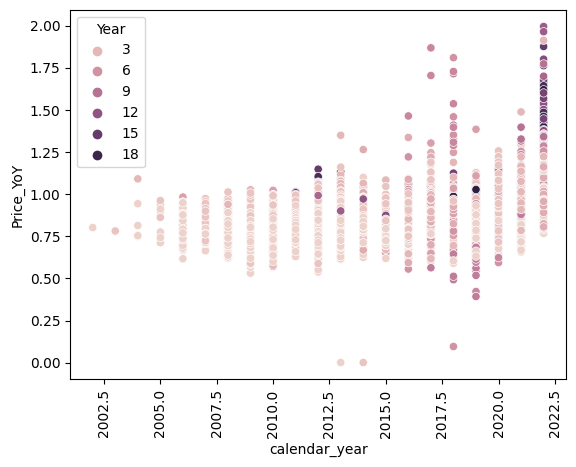

<Figure size 2000x1600 with 0 Axes>

In [25]:
sns.scatterplot(x=car_prices_for_calc["calendar_year"], y=car_prices_for_calc["Price_YoY"], hue=car_prices_for_calc["Year"])
# Rotate x-axis labels
plt.xticks(rotation=90)

#set size
plt.figure(figsize=(20, 16))

plt.show()

**We need to scale the prices YoY on year basis**  

*Investigating if values are noramlly distributed on calendar year basis*

In [26]:
z = car_prices_for_calc[car_prices_for_calc["Price_YoY"] > 0][car_prices_for_calc["calendar_year"] == 2018]
z

,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY,Next_YoY_Price,Next_YoY_Pr_Pred,calendar_year
310546,2,Fiat,Uno Mille Fire 1.0,2002,16,1.000050,0.938794,0.985112,2018
310547,3,Chevrolet,Astra Sport 2.0,2002,16,0.996724,0.871739,0.985112,2018
310548,5,Volkswagen,Golf GTi 1.8 Turbo,2002,16,0.961691,0.969709,0.985112,2018
310549,6,Fiat,Brava HGT 1.8 16V,2002,16,0.962075,0.888821,0.985112,2018
310550,7,Audi,A3 1.8 Turbo,2002,16,0.972814,0.918447,0.985112,2018
...,...,...,...,...,...,...,...,...,...
82044,21168,Mercedes-Benz,ML 63 AMG 5.5 V8,2014,4,0.946204,0.736178,0.930608,2018
102754,21197,Mercedes-Benz,GL 500 5.5 V8,2013,5,1.034333,0.826969,0.941001,2018
82052,21198,Mercedes-Benz,GL 500 4.7 V8,2014,4,0.968563,0.761846,0.930608,2018
82053,21199,Mercedes-Benz,GL 63 AMG 5.5 V8,2014,4,0.926561,0.838817,0.930608,2018


<AxesSubplot:xlabel='Price_YoY', ylabel='Count'>

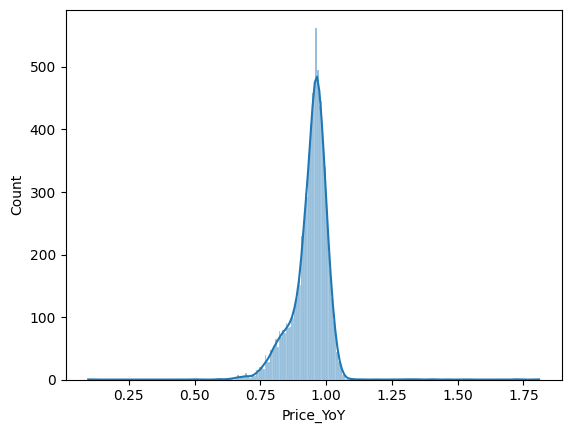

In [27]:
sns.histplot(z["Price_YoY"], kde=True, edgecolor='w')

**Year over Year Prices are normally distributed on Year basis, even if they may differ**

*Let's Standardize the prices!*
--> by standardizing the prices in a yearly basis, I (hope to) remove the effect of the year in the price

In [28]:
car_prices_w_price_scaled = car_prices_for_calc[car_prices_for_calc["calendar_year"] == 2]

In [29]:
car_prices_w_price_scaled["Price_sd_scaled"] = 0
#intentionally empty 
car_prices_w_price_scaled

,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY,Next_YoY_Price,Next_YoY_Pr_Pred,calendar_year,Price_sd_scaled


In [30]:
from sklearn.preprocessing import RobustScaler, StandardScaler
rb_scaler = RobustScaler() 
sd_scaler = StandardScaler() 


In [31]:
min_year = car_prices_for_calc["calendar_year"].min()
min_year
max_year = car_prices_for_calc["calendar_year"].max()
max_year

2022

In [33]:
for year in range(min_year,max_year+1):
    for car_year in range(1, 21):
        try:
            temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
            temp_df["Price_sd_scaled"] = sd_scaler.fit_transform(temp_df[['Price_YoY']]) 
            car_prices_w_price_scaled =  pd.concat([temp_df, car_prices_w_price_scaled])
        except:
            pass

/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key wil

/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key wil

/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key wil

/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key wil

/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key wil

/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key wil

/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key wil

/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key wil

/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key wil

/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key wil

/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key wil

/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = car_prices_for_calc[car_prices_for_calc["calendar_year"] == year][car_prices_for_calc["Year"] == car_year]
/tmp/ipykernel_40086/333216080.py:4: UserWarning: Boolean Series key wil

In [34]:
car_prices_w_price_scaled

,car_code,car_manufacturer,car_model,car_model_year,Year,Price_YoY,Next_YoY_Price,Next_YoY_Pr_Pred,calendar_year,Price_sd_scaled
373016,371,Volkswagen,Polo 1.6,2003,19,1.346345,1.022858,0.979539,2022,2.004089
373017,372,Ford,Fiesta Supercharger 1.0,2003,19,1.138171,1.052518,0.979539,2022,-0.039959
373021,376,Audi,S3 1.8 Turbo Quattro,2003,19,1.097381,1.095261,0.979539,2022,-0.440472
373022,377,Alfa Romeo,156 2.5 V6,2003,19,1.411365,0.990306,0.979539,2022,2.642515
373023,379,Volkswagen,Parati Tour 2.0,2003,19,1.166472,0.936489,0.979539,2022,0.237928
...,...,...,...,...,...,...,...,...,...,...
426,441,Audi,A8 4.2 V8 Quattro,2003,1,0.749652,0.961737,0.917069,2004,-0.836267
427,442,Land Rover,Range Rover HSE 4.4 V8,2003,1,0.753798,0.862201,0.917069,2004,-0.783237
20753,53,Volvo,S60 T5 2.3,2001,2,0.781296,1.090581,0.916243,2003,0.000000
50,53,Volvo,S60 T5 2.3,2001,1,0.801623,0.781296,0.917069,2002,0.000000


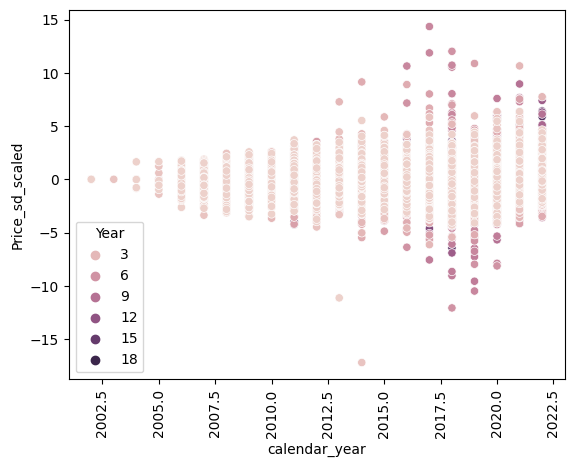

<Figure size 2000x1600 with 0 Axes>

In [35]:
sns.scatterplot(x=car_prices_w_price_scaled["calendar_year"], y=car_prices_w_price_scaled["Price_sd_scaled"], hue=car_prices_w_price_scaled["Year"])
# Rotate x-axis labels
plt.xticks(rotation=90)

#set size
plt.figure(figsize=(20, 16))

plt.show()

In [ ]:
sns.histplot(car_prices_w_price_scaled["calendar_year"]);
